In [1116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [1117]:
df1 = pd.read_excel(r"C:\Users\Riya\OneDrive\Desktop\Imarticus\Machine Learning\Project\HR Analytics\staff utlz latest 16-17_masked.xlsx")

In [1118]:
df1.head()

,Employee No,New_id,Profit Center,Employee Name,Employee Position,Employ_posi,Employee Location,Location,People Group,Employee Category,...,Unnamed: 14,Final_date,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Utilization%
0,1092,1092_17,PC - 3,Aaron Mcneil,Level 7,7,Location 1,1,Client Service Staff,Staff on Probation,...,2017-12-31,2017-12-31 00:00:00,120,32.0,32.0,8.0,80.0,0.0,0.0,1
1,490,490_16,PC - 5,Abagail Druci,Level 6,6,Location 1,1,Client Service Staff,Confirmed Staff,...,2017-12-31,2017-12-31 00:00:00,2088,1784.0,1072.0,304.0,0.0,0.0,920.0,0.600897
2,490,490_17,PC - 3,Abagail Druci,Level 6,6,Location 1,1,Client Service Staff,Confirmed Staff,...,2017-12-31,2017-12-31 00:00:00,2080,1832.0,1254.0,248.0,0.0,0.0,612.0,0.684498
3,655,655_16,PC - 3,Abigail Amabel,Level 7,7,Location 1,1,Client Service Staff,Confirmed Staff,...,2017-12-31,2017-12-31 00:00:00,1680,1527.0,0.0,120.0,33.0,0.0,1528.0,0
4,655,655_17,PC - 3,Abigail Amabel,Level 6,6,Location 1,1,Client Service Staff,Confirmed Staff,...,2017-12-31,2017-12-31 00:00:00,2080,1952.0,1728.5,128.0,0.0,0.0,248.0,0.885502


In [1119]:
df2 = pd.read_excel(r"C:\Users\Riya\OneDrive\Desktop\Imarticus\Machine Learning\Project\HR Analytics\staff utlz latest 17-18_masked.xlsx")

In [1120]:
df2.head()

,Employee No,Profit Center,Employee Name,Employee Position,Employee Location,People Group,Employee Category,Supervisor Name,Join Date,Current Status,Termination Date,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Utilization%
0,1,PC - 1,Rochette Jilleen,Level 1,Location 3,Client Service Staff,SVP/VP,Idalina Lauraine,2000-09-30,Active,NaT,2080,1864.5,448.0,188,27.5,1431.5,18.0,0.240279
1,2,PC - 2,Daryl Natalina,Level 2,Location 7,Client Service Staff,SVP/VP,Idalina Lauraine,1999-05-31,Active,NaT,2080,1868.0,722.0,208,4.0,600.5,596.5,0.38651
2,3,PC - 2,Annnora Gabrielle,Level 2,Location 7,Client Service Staff,SVP/VP,Idalina Lauraine,2001-01-31,Active,NaT,2080,1720.0,1173.0,338,22.0,463.5,357.5,0.681977
3,4,PC - 3,Barbee Joey,Level 2,Location 1,Client Service Staff,Resigned,Idalina Lauraine,2000-09-30,Resigned,2018-02-28,1840,1640.5,273.0,196,3.5,1361.0,24.0,0.166413
4,6,PC - 1,Jordanna Danya,Level 2,Location 3,Client Service Staff,SVP/VP,Idalina Lauraine,2002-06-30,Active,NaT,2080,1812.0,428.0,260,8.0,1237.0,470.0,0.236203


In [1121]:
df3 = pd.read_excel(r"C:\Users\Riya\OneDrive\Desktop\Imarticus\Machine Learning\Project\HR Analytics\Terminations 15-18.xlsx")

In [1122]:
df3.head()

,Employee Number,Employee Name,Year of Birth,Gender,Leaving Reason,Previous Employer,Last Update Date,Latest Available Rating,Emp Ref.
0,4,Barbee Joey,1975,M,Career Growth,kadoo,2018-02-27,NaN,NaN
1,8,Kakalina Lorry,1980,F,Career Growth,cynoid,2017-02-17,3.0,NaN
2,11,Aili Nessy,1982,M,Career Growth,NaN,2017-01-12,2.0,NaN
3,15,Peria Maryjo,1979,M,Career Growth,flimbo,2016-09-15,3.0,NaN
4,19,Cordey Sofia,1982,F,Employee Transfer,NaN,2018-04-26,NaN,NaN


In [1123]:
df1.shape

(1762, 24)

In [1124]:
df1.dtypes

Employee No                       int64
New_id                           object
Profit Center                    object
Employee Name                    object
Employee Position                object
Employ_posi                      object
Employee Location                object
Location                          int64
People Group                     object
Employee Category                object
Supervisor Name                  object
Join Date                datetime64[ns]
Current Status                   object
Termination Date                 object
Unnamed: 14              datetime64[ns]
Final_date                       object
Total Hours                       int64
Total Available Hours           float64
Work Hours                      float64
Leave Hours                     float64
Training Hours                  float64
BD Hours                        float64
NC Hours                        float64
Utilization%                     object
dtype: object

In [1125]:
df1.columns

Index(['Employee No', 'New_id', 'Profit Center', 'Employee Name',
       'Employee Position', 'Employ_posi', 'Employee Location', 'Location',
       'People Group', 'Employee Category', 'Supervisor Name', 'Join Date',
       'Current Status', 'Termination Date', 'Unnamed: 14', 'Final_date',
       'Total Hours', 'Total Available Hours', 'Work Hours', 'Leave Hours',
       'Training Hours', 'BD Hours', 'NC Hours', 'Utilization%'],
      dtype='object')

In [1126]:
df2.shape

(973, 19)

In [1127]:
df2.dtypes

Employee No                       int64
Profit Center                    object
Employee Name                    object
Employee Position                object
Employee Location                object
People Group                     object
Employee Category                object
Supervisor Name                  object
Join Date                datetime64[ns]
Current Status                   object
Termination Date         datetime64[ns]
Total Hours                       int64
Total Available Hours           float64
Work Hours                      float64
Leave Hours                       int64
Training Hours                  float64
BD Hours                        float64
NC Hours                        float64
Utilization%                     object
dtype: object

In [1128]:
df2.columns

Index(['Employee No', 'Profit Center', 'Employee Name', 'Employee Position',
       'Employee Location', 'People Group', 'Employee Category',
       'Supervisor Name', 'Join Date', 'Current Status', 'Termination Date',
       'Total Hours', 'Total Available Hours', 'Work Hours', 'Leave Hours',
       'Training Hours', 'BD Hours', 'NC Hours', 'Utilization%'],
      dtype='object')

## Data Cleaning

In [1129]:
#adding underscore between column names
l1 = []
l2 = []
l3 = []
col1 = df1.columns.to_list()
col2 = df2.columns.to_list()
col3 = df3.columns.to_list()
for i in col1:
    m = "_".join(i.split())
    l1.append(m)
for j in col2:
    n = "_".join(j.split())
    l2.append(n)
for k in col3:
    o = "_".join(k.split())
    l3.append(o)
df1.columns = l1
df2.columns = l2
df3.columns = l3

In [1130]:
#drop new id
df1.drop(columns = ["New_id"], inplace = True)

In [1131]:
#profit center
l1 = []
l2 = []
col1 = df1["Profit_Center"].to_list()
col2 = df2["Profit_Center"].to_list()
for i in col1:
    j = i.split("- ")
    l1.append(j[1])
for i in col2:
    j = i.split("- ")
    l2.append(j[1])
df1["Profit_Center"] = l1
df2["Profit_Center"] = l2

In [1132]:
#employee position
df1.drop(columns = ["Employee_Position"], inplace = True)
df1.rename(columns = {"Employ_posi" : "Employee_Position"}, inplace = True)
l = []
col = df2["Employee_Position"].to_list()
for i in col:
    j = i.split(" ")
    if len(j) == 1:
        l.append(j[0])
    else:
        l.append(j[1])
df2["Employee_Position"] = l2

df1["Employee_Position"] = df1["Employee_Position"].replace(["-"], np.nan)
df2["Employee_Position"] = df2["Employee_Position"].replace(["-"], np.nan)

In [1133]:
#employee location
l1 = []
l2 = []
col1 = df1["Employee_Location"].to_list()
col2 = df2["Employee_Location"].to_list()
for i in col1:
    m = i.split(" ")
    l1.append(m[1])
for j in col2:
    n = i.split(" ")
    l2.append(n[1])
df1["Employee_Location"] = l1
df2["Employee_Location"] = l2

In [1134]:
#drop duplicate and unnecessary columns
df1.drop(columns = ["Location", "Unnamed:_14", "Final_date"], inplace = True)

In [1135]:
#handle missing values in termination data
df1["Termination_Date"] = df1["Termination_Date"].replace(["-", pd.NaT], np.nan)
df2["Termination_Date"] = df2["Termination_Date"].replace(["-", pd.NaT], np.nan)

In [1136]:
#handle missing values in utilization percentage
df1["Utilization%"] = df1["Utilization%"].replace(["-"], 0)
df2["Utilization%"] = df2["Utilization%"].replace(["-"], 0)

In [1137]:
#concat both df1 and df2
df = pd.concat([df1, df2])

In [1138]:
df.head()

,Employee_No,Profit_Center,Employee_Name,Employee_Position,Employee_Location,People_Group,Employee_Category,Supervisor_Name,Join_Date,Current_Status,Termination_Date,Total_Hours,Total_Available_Hours,Work_Hours,Leave_Hours,Training_Hours,BD_Hours,NC_Hours,Utilization%
0,1092,3,Aaron Mcneil,7,1,Client Service Staff,Staff on Probation,Kali Gwendolyn,2018-03-31,New Joiner,NaT,120,32.0,32.0,8.0,80.0,0.0,0.0,1.000000
1,490,5,Abagail Druci,6,1,Client Service Staff,Confirmed Staff,Orsa Margeaux,2015-11-30,Active,NaT,2088,1784.0,1072.0,304.0,0.0,0.0,920.0,0.600897
2,490,3,Abagail Druci,6,1,Client Service Staff,Confirmed Staff,Orsa Margeaux,2015-11-30,Active,NaT,2080,1832.0,1254.0,248.0,0.0,0.0,612.0,0.684498
3,655,3,Abigail Amabel,7,1,Client Service Staff,Confirmed Staff,Iormina Lucienne,2016-06-30,Active,NaT,1680,1527.0,0.0,120.0,33.0,0.0,1528.0,0.000000
4,655,3,Abigail Amabel,6,1,Client Service Staff,Confirmed Staff,Iormina Lucienne,2016-06-30,Active,NaT,2080,1952.0,1728.5,128.0,0.0,0.0,248.0,0.885502


In [1139]:
#rename column
df3.rename(columns = {"Employee_Number" : "Employee_No"}, inplace = True)

In [1140]:
#merge concated df and df3
d = pd.merge(df, df3, on = ["Employee_No", "Employee_Name"])

In [1141]:
d.head()

,Employee_No,Profit_Center,Employee_Name,Employee_Position,Employee_Location,People_Group,Employee_Category,Supervisor_Name,Join_Date,Current_Status,...,BD_Hours,NC_Hours,Utilization%,Year_of_Birth,Gender,Leaving_Reason,Previous_Employer,Last_Update_Date,Latest_Available_Rating,Emp_Ref.
0,776,3,Adelaide Robina,8,1,Client Service Staff,Staff on Probation,Ophelie Jyoti,2017-03-31,New Joiner,...,0.0,40.0,0.642857,1989,F,Career Growth,unent,2018-06-11,NaN,NaN
1,776,3,Adelaide Robina,8,1,Client Service Staff,Serving Notice Period,Ophelie Jyoti,2017-03-31,Active,...,0.0,665.5,0.854609,1989,F,Career Growth,unent,2018-06-11,NaN,NaN
2,776,3,Adelaide Robina,3,7,Client Service Staff,Serving Notice Period,Ophelie Jyoti,2017-03-31,Active,...,0.0,665.5,0.854609,1989,F,Career Growth,unent,2018-06-11,NaN,NaN
3,144,6,Agna Matelda,5,7,Client Service Staff,Serving Notice Period,Tallia Eyde,2013-02-28,Resigned,...,452.0,340.0,0.010309,1980,M,Personal,perive,2016-09-07,3.0,NaN
4,978,1,Aidan Lewis,NaN,8,Client Service Staff,Serving Notice Period,Josey Rorie,2017-09-30,Active,...,0.0,16.0,0.984615,1990,M,Personal,Pop-Culture,2018-06-15,NaN,NaN


In [1142]:
d.columns

Index(['Employee_No', 'Profit_Center', 'Employee_Name', 'Employee_Position',
       'Employee_Location', 'People_Group', 'Employee_Category',
       'Supervisor_Name', 'Join_Date', 'Current_Status', 'Termination_Date',
       'Total_Hours', 'Total_Available_Hours', 'Work_Hours', 'Leave_Hours',
       'Training_Hours', 'BD_Hours', 'NC_Hours', 'Utilization%',
       'Year_of_Birth', 'Gender', 'Leaving_Reason', 'Previous_Employer',
       'Last_Update_Date', 'Latest_Available_Rating', 'Emp_Ref.'],
      dtype='object')

## Exploratory Data Analysis (EDA) 

In [1143]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 582 entries, 0 to 581
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Employee_No              582 non-null    int64         
 1   Profit_Center            582 non-null    object        
 2   Employee_Name            582 non-null    object        
 3   Employee_Position        579 non-null    object        
 4   Employee_Location        582 non-null    object        
 5   People_Group             582 non-null    object        
 6   Employee_Category        582 non-null    object        
 7   Supervisor_Name          582 non-null    object        
 8   Join_Date                582 non-null    datetime64[ns]
 9   Current_Status           582 non-null    object        
 10  Termination_Date         430 non-null    datetime64[ns]
 11  Total_Hours              582 non-null    int64         
 12  Total_Available_Hours    582 non-nul

## Univariate Analysis - Categorical

In [1144]:
d.dtypes[d.dtypes == "object"].index

Index(['Profit_Center', 'Employee_Name', 'Employee_Position',
       'Employee_Location', 'People_Group', 'Employee_Category',
       'Supervisor_Name', 'Current_Status', 'Gender', 'Leaving_Reason',
       'Previous_Employer', 'Emp_Ref.'],
      dtype='object')

In [1145]:
def univariate_category(data, col):
    missing = data[col].isnull().sum()
    unique_count = data[col].nunique()
    unique_category = list(data[col].unique())
    f1 = pd.DataFrame(data[col].value_counts(dropna = False))
    f1.rename(columns = {col:"Count"}, inplace = True)
    f2 = pd.DataFrame(data[col].value_counts(normalize = True))
    f2.rename(columns = {col:"Percentage"}, inplace = True)
    f2["Percentage"] = (f2["Percentage"]*100).round(2).astype(str)+"%"
    f = pd.concat([f1, f2], axis = 1)
    
    print(f"Total missing values : {missing}\n")
    print(f"Total count of unique categories: {unique_count}\n")
    print(f"Unique Categories :\n{unique_category}")
    print(f"Value Count and %\n", f)
    
    plt.figure(figsize=(11,7))
    ax = sns.countplot(data = data, x = col)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 40)
    plt.tight_layout()
    plt.show()

Total missing values : 0

Total count of unique categories: 6

Unique Categories :
['3', '6', '1', '2', '5', '7']
Value Count and %
    Count Percentage
3    212     36.43%
2    148     25.43%
1    126     21.65%
5     53      9.11%
6     40      6.87%
7      3      0.52%


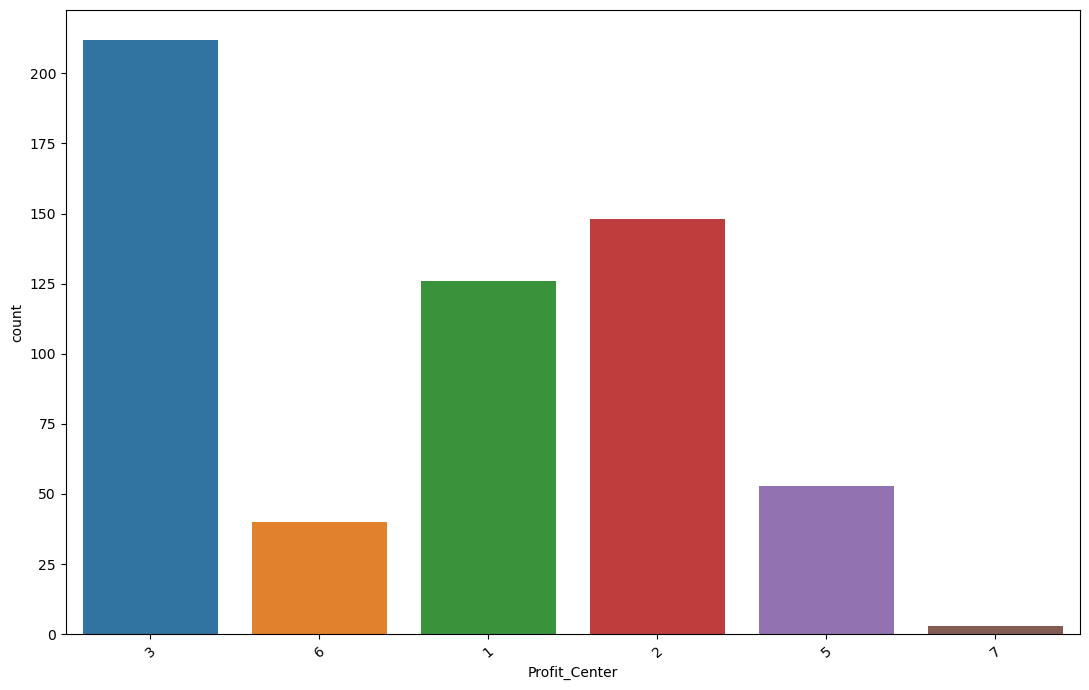

In [1146]:
#profit center
univariate_category(d, "Profit_Center")

In [1147]:
#employee name
d["Employee_Name"].isnull().sum()

0

Total missing values : 3

Total count of unique categories: 9

Unique Categories :
['8', '3', '5', nan, '1', '4', '2', '7', '6', '0']
Value Count and %
      Count Percentage
8      152     26.25%
7      137     23.66%
6       82     14.16%
3       67     11.57%
2       47      8.12%
1       43      7.43%
5       37      6.39%
4       13      2.25%
NaN      3        NaN
0        1      0.17%


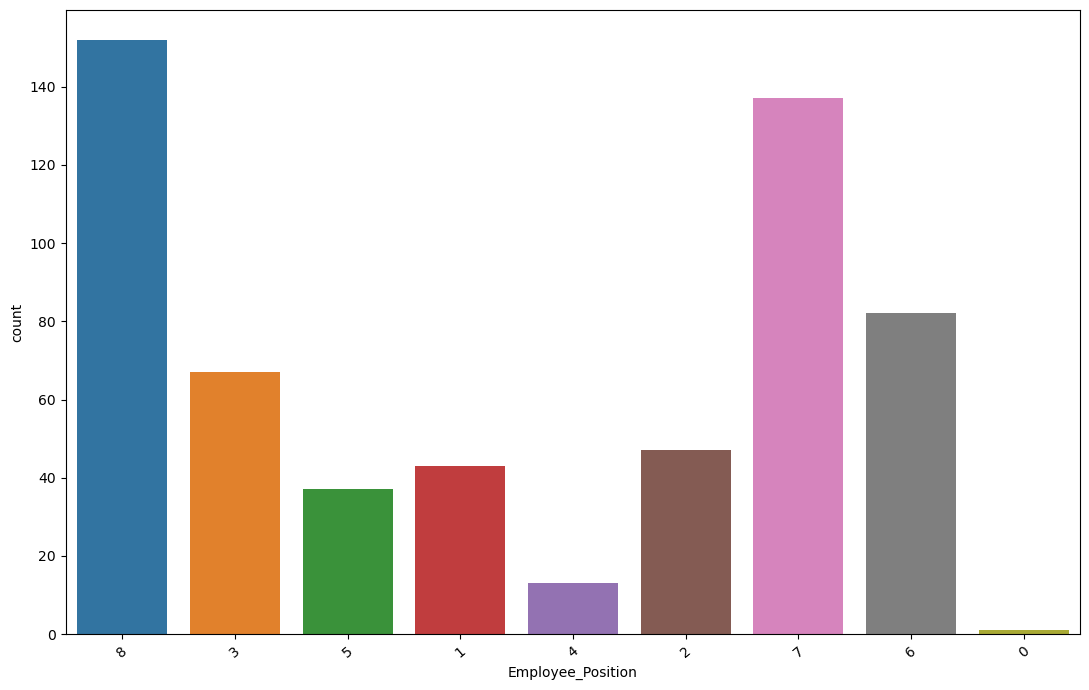

In [1148]:
#employee position
univariate_category(d, "Employee_Position")

Total missing values : 0

Total count of unique categories: 9

Unique Categories :
['1', '7', '8', '9', '3', '2', '6', '4', '5']
Value Count and %
    Count Percentage
7    275     47.25%
1    118     20.27%
3    104     17.87%
2     31      5.33%
4     23      3.95%
9     17      2.92%
8      7       1.2%
6      5      0.86%
5      2      0.34%


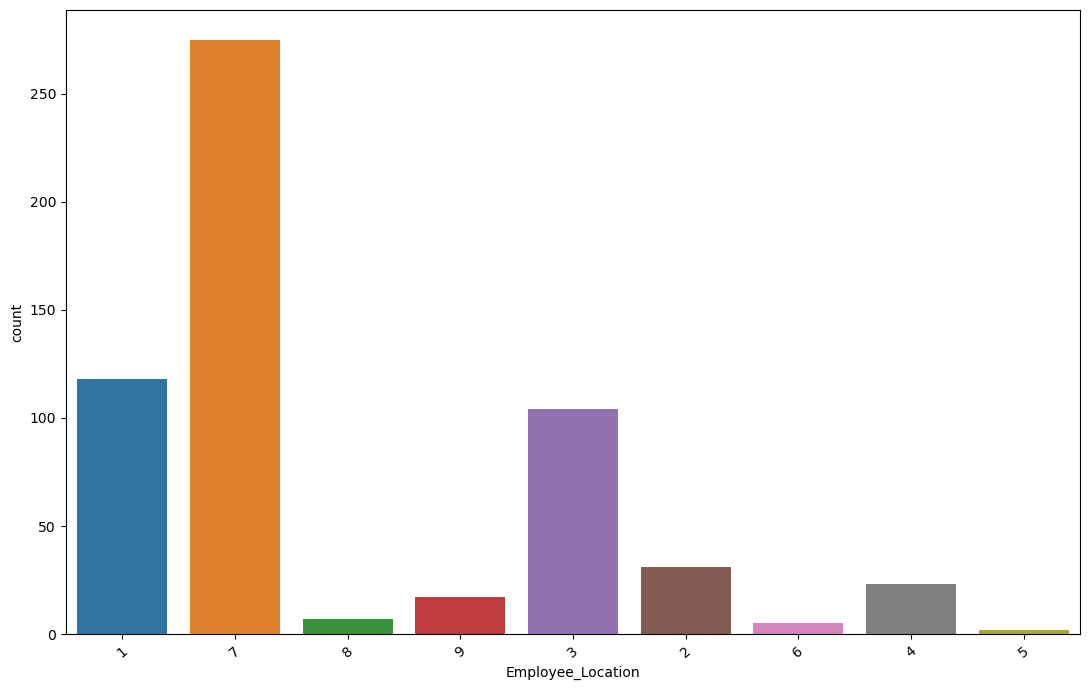

In [1149]:
#employee location
univariate_category(d, "Employee_Location")

Total missing values : 0

Total count of unique categories: 2

Unique Categories :
['Client Service Staff', 'Support Staff']
Value Count and %
                       Count Percentage
Client Service Staff    579     99.48%
Support Staff             3      0.52%


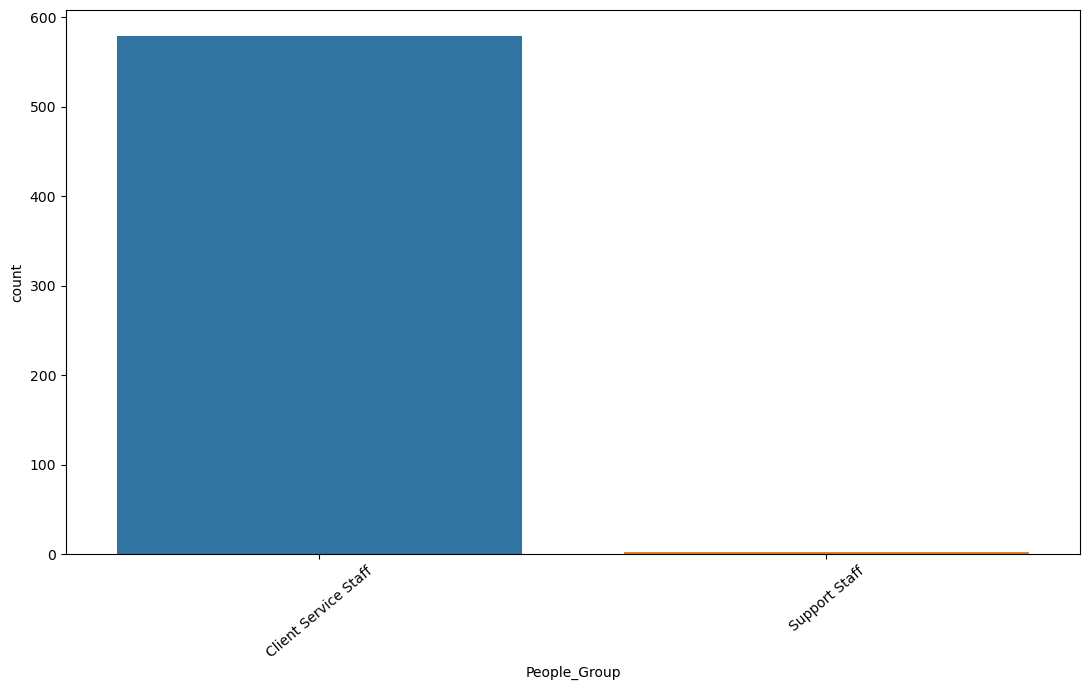

In [1150]:
#people group
univariate_category(d, "People_Group")

In [1151]:
#supervisor name
d["Supervisor_Name"].isnull().sum()

0

Total missing values : 0

Total count of unique categories: 7

Unique Categories :
['Staff on Probation', 'Serving Notice Period', 'Confirmed Staff', 'Resigned', 'Level 1/2', 'Awaiting Termination', 'Secondee-Outward-Without Pay']
Value Count and %
                               Count Percentage
Resigned                        290     49.83%
Serving Notice Period           183     31.44%
Confirmed Staff                  87     14.95%
Staff on Probation               11      1.89%
Awaiting Termination              8      1.37%
Secondee-Outward-Without Pay      2      0.34%
Level 1/2                         1      0.17%


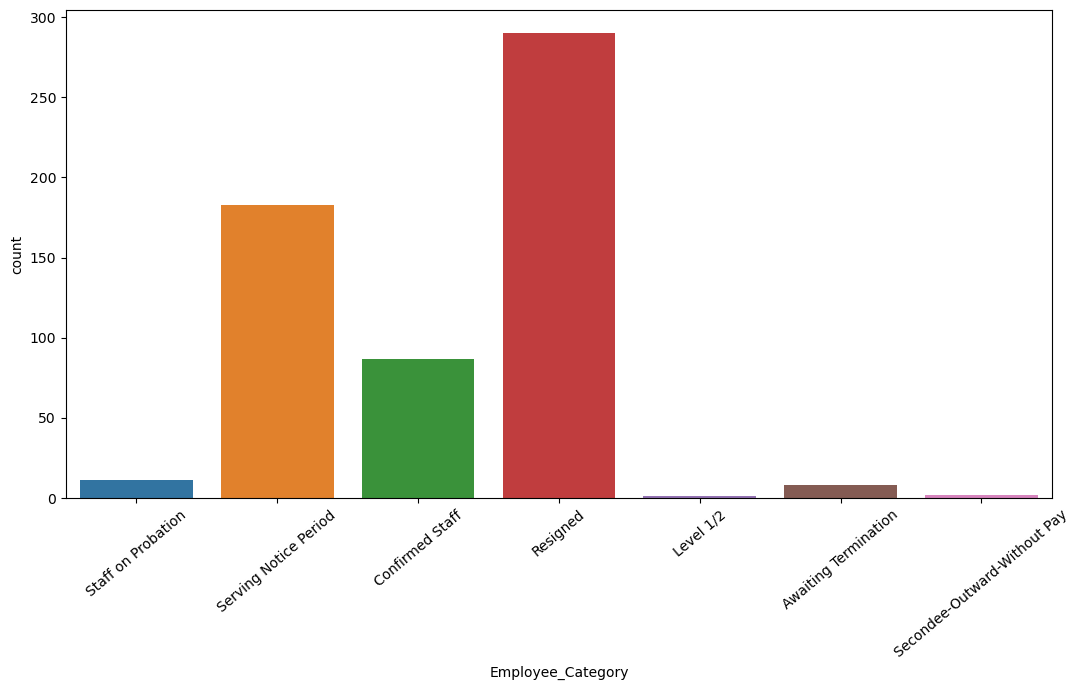

In [1152]:
#employee category
univariate_category(d, "Employee_Category")

Total missing values : 0

Total count of unique categories: 2

Unique Categories :
['F', 'M']
Value Count and %
    Count Percentage
M    391     67.18%
F    191     32.82%


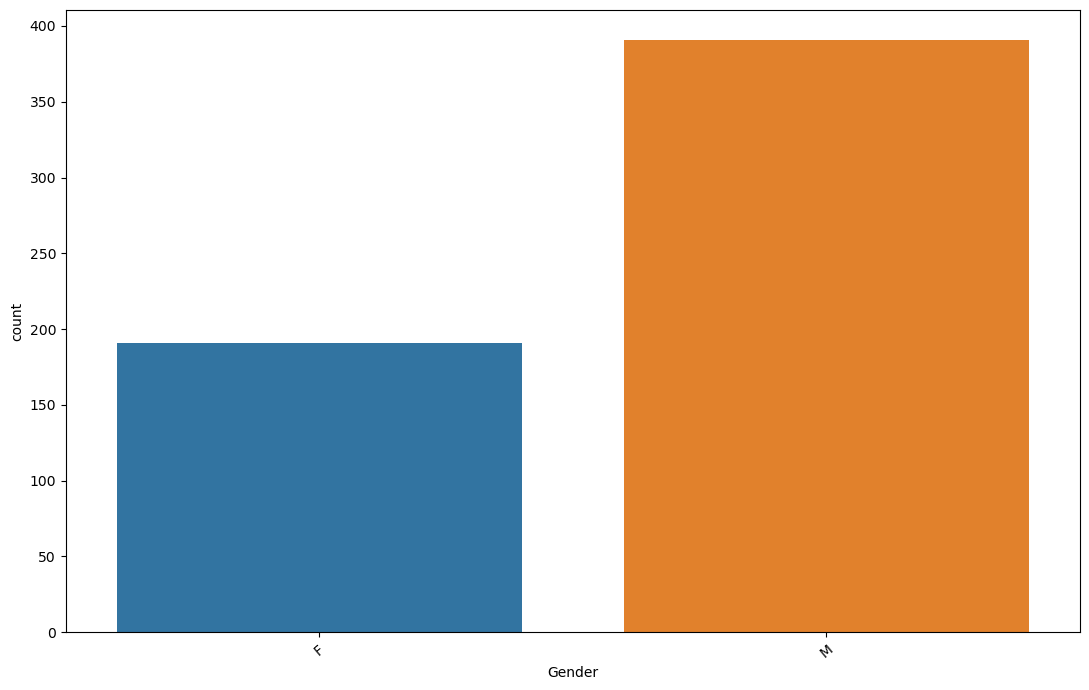

In [1153]:
#gender
univariate_category(d, "Gender")

Total missing values : 0

Total count of unique categories: 11

Unique Categories :
['Career Growth', 'Personal', 'Further Studies', 'Counseled Out', 'Job Related', 'Deceased', 'Absconding', 'Employee Transfer', 'Others', 'Working Conditions', 'Relationship Issues']
Value Count and %
                      Count Percentage
Career Growth          250     42.96%
Personal               199     34.19%
Further Studies         80     13.75%
Job Related             20      3.44%
Counseled Out           10      1.72%
Absconding               5      0.86%
Others                   5      0.86%
Working Conditions       4      0.69%
Deceased                 3      0.52%
Employee Transfer        3      0.52%
Relationship Issues      3      0.52%


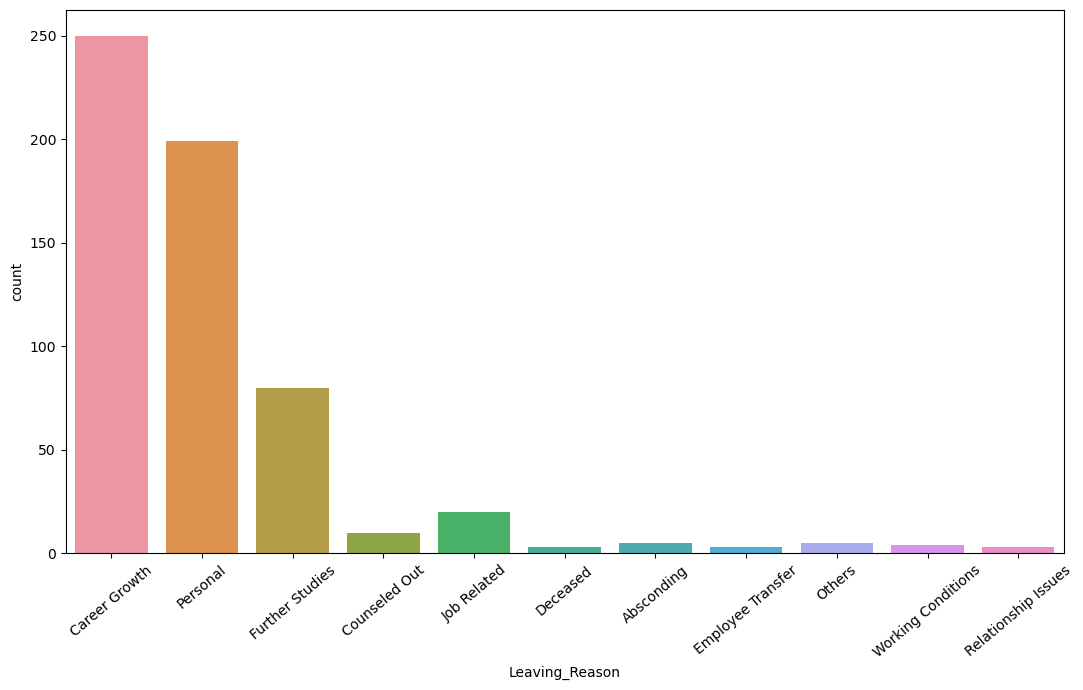

In [1154]:
#leaving reason
univariate_category(d, "Leaving_Reason")

In [1155]:
d["Previous_Employer"].isnull().sum()

134

Total missing values : 556

Total count of unique categories: 1

Unique Categories :
[nan, 'Yes']
Value Count and %
      Count Percentage
NaN    556        NaN
Yes     26     100.0%


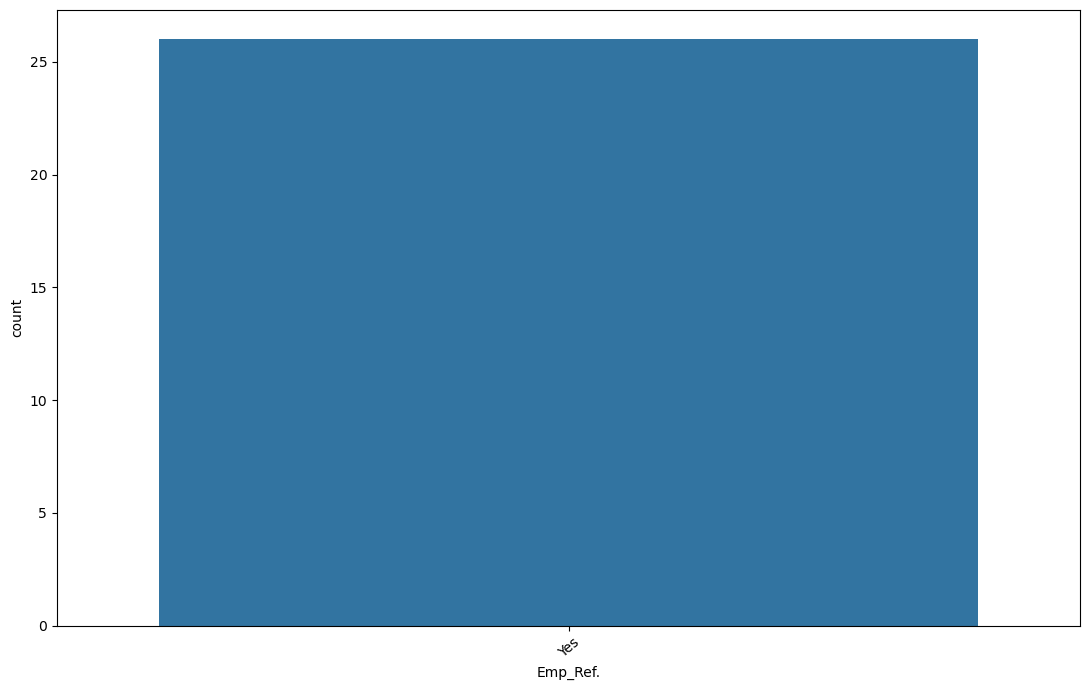

In [1156]:
#employee reference
univariate_category(d, "Emp_Ref.")

## Univariate Analysis - Numerical 

In [1157]:
d.dtypes[d.dtypes != "object"].index

Index(['Employee_No', 'Join_Date', 'Termination_Date', 'Total_Hours',
       'Total_Available_Hours', 'Work_Hours', 'Leave_Hours', 'Training_Hours',
       'BD_Hours', 'NC_Hours', 'Utilization%', 'Year_of_Birth',
       'Last_Update_Date', 'Latest_Available_Rating'],
      dtype='object')

In [1158]:
def univariate_numerical(data, col):
    missing = data[col].isnull().sum()
    min_val = round(data[col].min(), 2)
    max_val = round(data[col].max(), 2)
    mean = round(data[col].mean(), 2)
    var = round(data[col].var(), 2)
    std = round(data[col].std(), 2)
    range_val = round(max_val - min_val, 2)
    q1 = round(data[col].quantile(.25), 2)
    q2 = round(data[col].quantile(.5), 2)
    q3 = round(data[col].quantile(.75), 2)
    skew = round(data[col].skew(), 2)
    kurt = round(data[col].kurt(), 2)
    my_val = {"missing" : missing, "min" : min_val, "max" : max_val, "mean" : mean,
             "var" : var,"std" : std, "range" : range_val,"q1" : q1, "q2" : q2,"q3" : q3,
            "skewness" : skew, "kurtosis" : kurt}
    sns.histplot(data[col])
    plt.show()
    sns.boxplot(data = data, y = data[col])
    plt.show()
    return my_val

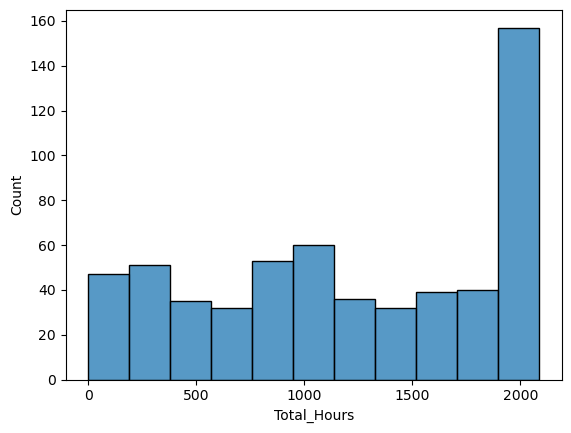

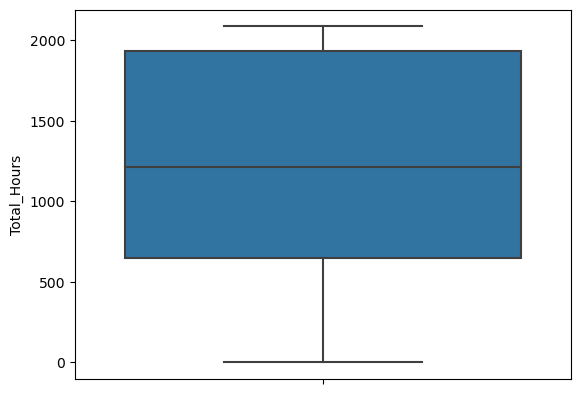

{'missing': 0,
 'min': 0,
 'max': 2088,
 'mean': 1228.7,
 'var': 469290.63,
 'std': 685.05,
 'range': 2088,
 'q1': 648.0,
 'q2': 1212.0,
 'q3': 1932.0,
 'skewness': -0.15,
 'kurtosis': -1.34}

In [1159]:
#total hours
univariate_numerical(d, "Total_Hours")

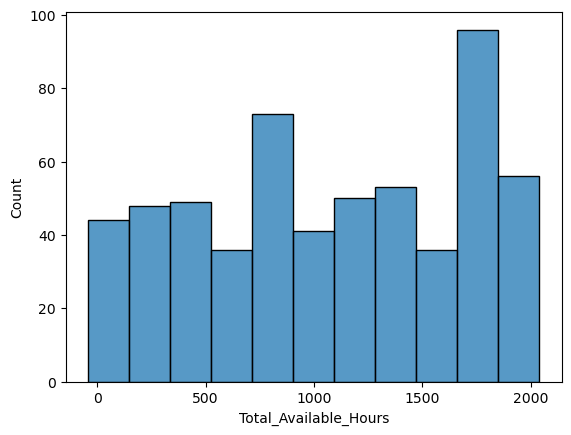

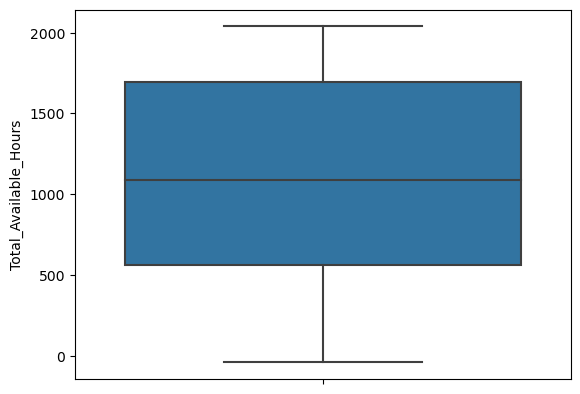

{'missing': 0,
 'min': -40.0,
 'max': 2039.0,
 'mean': 1074.18,
 'var': 365464.57,
 'std': 604.54,
 'range': 2079.0,
 'q1': 560.5,
 'q2': 1088.75,
 'q3': 1695.0,
 'skewness': -0.14,
 'kurtosis': -1.28}

In [1160]:
#total available hours
univariate_numerical(d, "Total_Available_Hours")

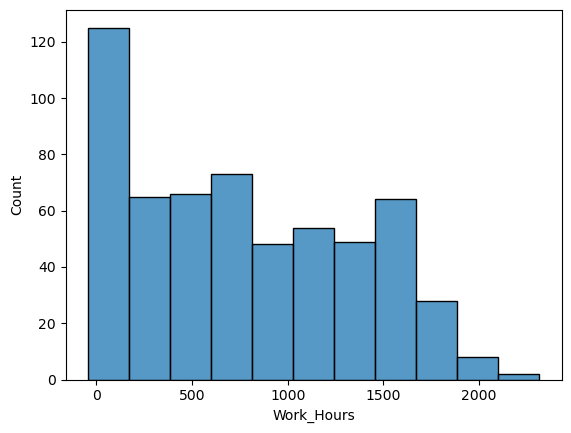

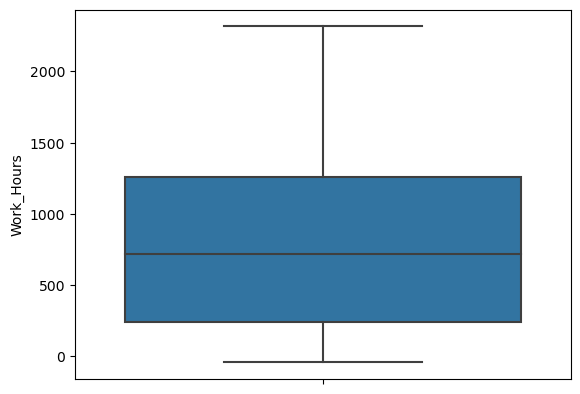

{'missing': 0,
 'min': -42.0,
 'max': 2316.0,
 'mean': 772.92,
 'var': 333394.51,
 'std': 577.4,
 'range': 2358.0,
 'q1': 240.0,
 'q2': 720.0,
 'q3': 1260.0,
 'skewness': 0.3,
 'kurtosis': -1.1}

In [1161]:
#work hours
univariate_numerical(d, "Work_Hours")

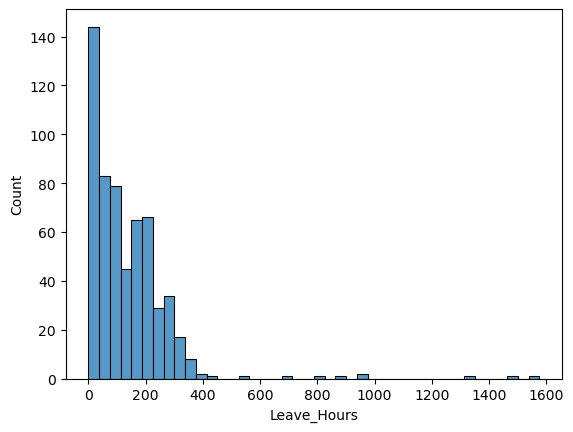

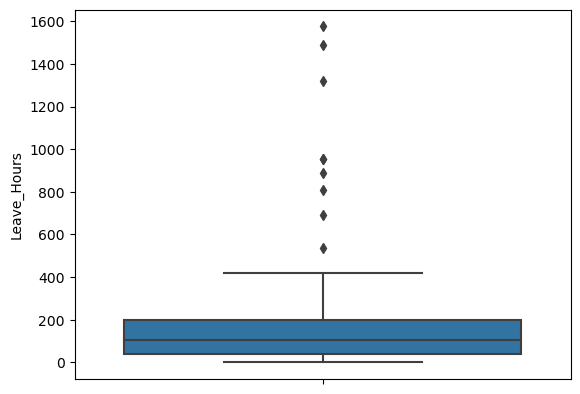

{'missing': 0,
 'min': 0.0,
 'max': 1576.0,
 'mean': 135.41,
 'var': 23778.56,
 'std': 154.2,
 'range': 1576.0,
 'q1': 40.0,
 'q2': 104.0,
 'q3': 200.0,
 'skewness': 4.36,
 'kurtosis': 31.67}

In [1162]:
#leave hours
univariate_numerical(d, "Leave_Hours")

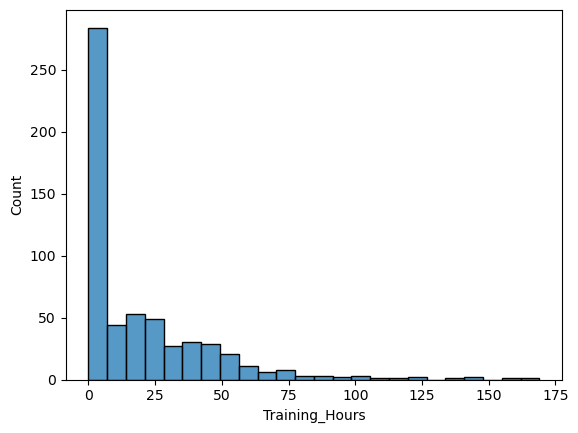

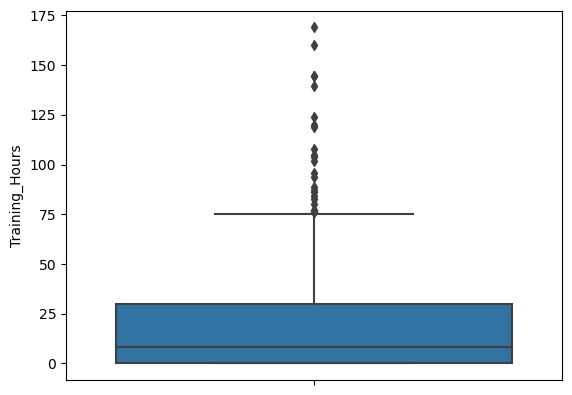

{'missing': 0,
 'min': 0.0,
 'max': 169.0,
 'mean': 19.11,
 'var': 698.63,
 'std': 26.43,
 'range': 169.0,
 'q1': 0.0,
 'q2': 8.0,
 'q3': 30.0,
 'skewness': 2.12,
 'kurtosis': 6.03}

In [1163]:
#training hours
univariate_numerical(d, "Training_Hours")

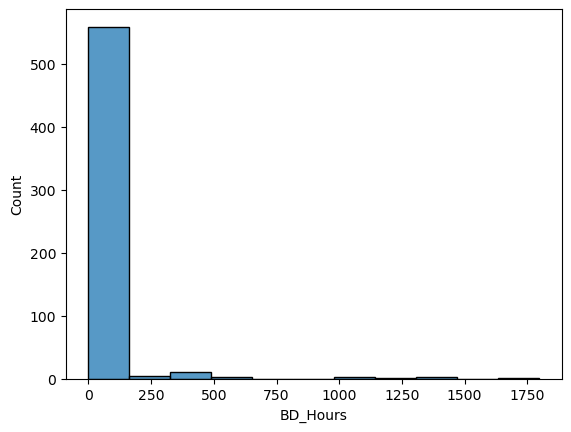

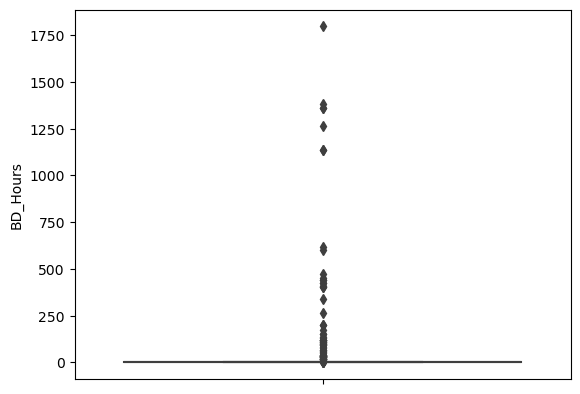

{'missing': 0,
 'min': 0.0,
 'max': 1798.0,
 'mean': 31.94,
 'var': 26515.36,
 'std': 162.84,
 'range': 1798.0,
 'q1': 0.0,
 'q2': 0.0,
 'q3': 0.0,
 'skewness': 7.29,
 'kurtosis': 58.9}

In [1164]:
#BD hours
univariate_numerical(d, "BD_Hours")

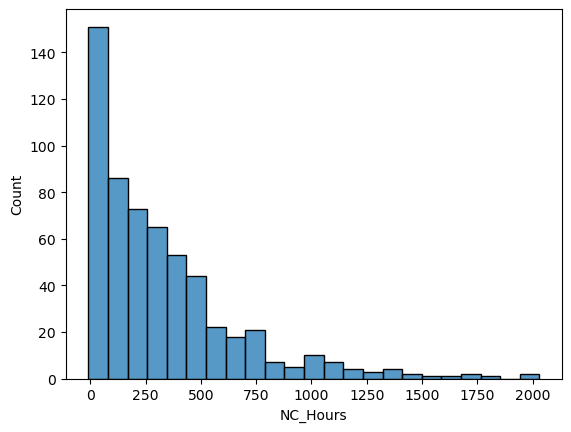

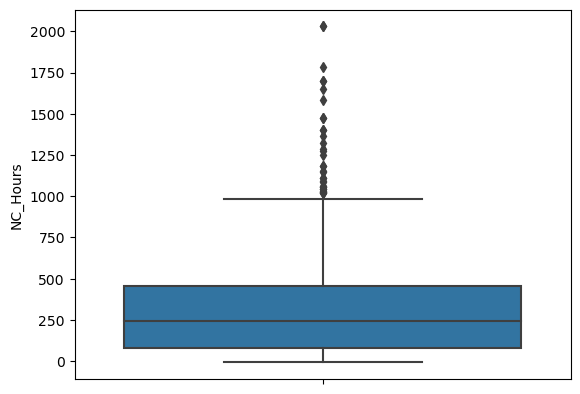

{'missing': 0,
 'min': -8.0,
 'max': 2030.0,
 'mean': 326.3,
 'var': 114483.51,
 'std': 338.35,
 'range': 2038.0,
 'q1': 80.0,
 'q2': 240.0,
 'q3': 454.0,
 'skewness': 1.84,
 'kurtosis': 4.26}

In [1165]:
#NC hours
univariate_numerical(d, "NC_Hours")

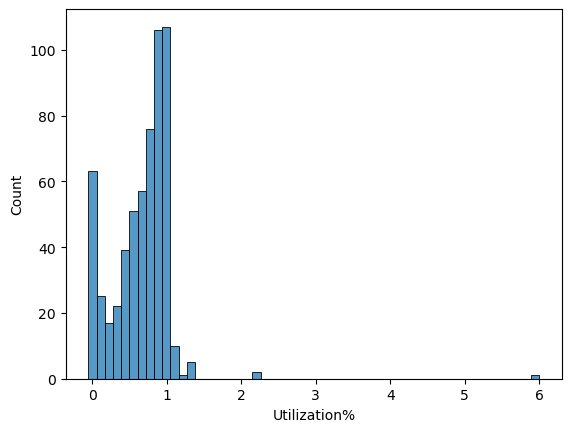

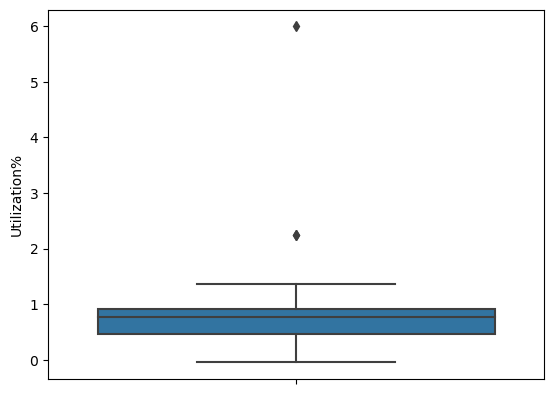

{'missing': 0,
 'min': -0.05,
 'max': 6.0,
 'mean': 0.66,
 'var': 0.17,
 'std': 0.41,
 'range': 6.05,
 'q1': 0.45,
 'q2': 0.76,
 'q3': 0.92,
 'skewness': 3.53,
 'kurtosis': 47.98}

In [1166]:
#utilization %
univariate_numerical(d, "Utilization%")

In [1167]:
d.dtypes

Employee_No                         int64
Profit_Center                      object
Employee_Name                      object
Employee_Position                  object
Employee_Location                  object
People_Group                       object
Employee_Category                  object
Supervisor_Name                    object
Join_Date                  datetime64[ns]
Current_Status                     object
Termination_Date           datetime64[ns]
Total_Hours                         int64
Total_Available_Hours             float64
Work_Hours                        float64
Leave_Hours                       float64
Training_Hours                    float64
BD_Hours                          float64
NC_Hours                          float64
Utilization%                      float64
Year_of_Birth                       int64
Gender                             object
Leaving_Reason                     object
Previous_Employer                  object
Last_Update_Date           datetim

In [1168]:
d["Year_of_Birth"].isnull().sum()

0

In [1169]:
d["Last_Update_Date"].isnull().sum()

0

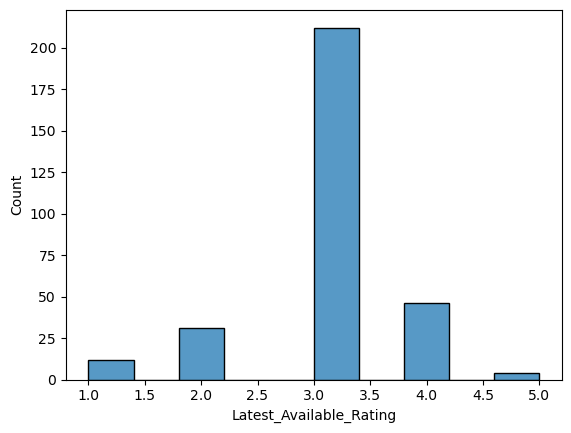

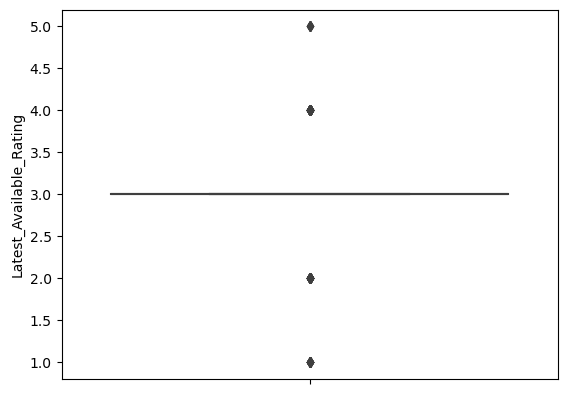

{'missing': 277,
 'min': 1.0,
 'max': 5.0,
 'mean': 3.0,
 'var': 0.46,
 'std': 0.68,
 'range': 4.0,
 'q1': 3.0,
 'q2': 3.0,
 'q3': 3.0,
 'skewness': -0.5,
 'kurtosis': 2.15}

In [1170]:
#rating
univariate_numerical(d, "Latest_Available_Rating")

## Bivariate Analysis 

### 1. Categorical - Categorical 

In [1171]:
d.dtypes[d.dtypes == "object"].index

Index(['Profit_Center', 'Employee_Name', 'Employee_Position',
       'Employee_Location', 'People_Group', 'Employee_Category',
       'Supervisor_Name', 'Current_Status', 'Gender', 'Leaving_Reason',
       'Previous_Employer', 'Emp_Ref.'],
      dtype='object')

In [1172]:
pd.crosstab(d["Current_Status"], d["Profit_Center"], normalize = "index")

Profit_Center,1,2,3,5,6,7
Current_Status,,,,,,
Active,0.208333,0.138889,0.395833,0.125000,0.125000,0.006944
New Joiner,0.000000,0.166667,0.666667,0.000000,0.166667,0.000000
Resigned,0.223256,0.295349,0.348837,0.081395,0.046512,0.004651
Secondment,0.000000,0.000000,0.500000,0.000000,0.500000,0.000000


In [1173]:
pd.crosstab(d["Current_Status"], d["Employee_Position"], normalize = "index")

Employee_Position,0,1,2,3,4,5,6,7,8
Current_Status,,,,,,,,,
Active,0.000000,0.048951,0.013986,0.062937,0.034965,0.076923,0.139860,0.328671,0.293706
New Joiner,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.166667,0.166667,0.500000
Resigned,0.002336,0.084112,0.105140,0.135514,0.018692,0.058411,0.140187,0.207944,0.247664
Secondment,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.500000


In [1174]:
pd.crosstab(d["Current_Status"], d["Employee_Location"], normalize = "index")

Employee_Location,1,2,3,4,5,6,7,8,9
Current_Status,,,,,,,,,
Active,0.236111,0.090278,0.229167,0.076389,0.006944,0.013889,0.319444,0.006944,0.020833
New Joiner,0.666667,0.000000,0.000000,0.166667,0.000000,0.000000,0.166667,0.000000,0.000000
Resigned,0.186047,0.039535,0.165116,0.023256,0.002326,0.006977,0.530233,0.013953,0.032558
Secondment,0.000000,0.500000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000


In [1175]:
pd.crosstab(d["Current_Status"], d["People_Group"], normalize = "index")

People_Group,Client Service Staff,Support Staff
Current_Status,,
Active,0.993056,0.006944
New Joiner,1.000000,0.000000
Resigned,0.995349,0.004651
Secondment,1.000000,0.000000


In [1176]:
pd.crosstab(d["Current_Status"], d["Employee_Category"], normalize = "index")

Employee_Category,Awaiting Termination,Confirmed Staff,Level 1/2,Resigned,Secondee-Outward-Without Pay,Serving Notice Period,Staff on Probation
Current_Status,,,,,,,
Active,0.048611,0.604167,0.006944,0.000000,0.0,0.31250,0.027778
New Joiner,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,1.000000
Resigned,0.002326,0.000000,0.000000,0.674419,0.0,0.32093,0.002326
Secondment,0.000000,0.000000,0.000000,0.000000,1.0,0.00000,0.000000


In [1177]:
pd.crosstab(d["Current_Status"], d["Gender"], normalize = "index")

Gender,F,M
Current_Status,,
Active,0.333333,0.666667
New Joiner,0.333333,0.666667
Resigned,0.327907,0.672093
Secondment,0.000000,1.000000


In [1178]:
pd.crosstab(d["Current_Status"], d["Leaving_Reason"], normalize = "index")

Leaving_Reason,Absconding,Career Growth,Counseled Out,Deceased,Employee Transfer,Further Studies,Job Related,Others,Personal,Relationship Issues,Working Conditions
Current_Status,,,,,,,,,,,
Active,0.006944,0.409722,0.020833,0.006944,0.006944,0.180556,0.034722,0.000000,0.333333,0.000000,0.000000
New Joiner,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000
Resigned,0.009302,0.430233,0.016279,0.004651,0.004651,0.125581,0.034884,0.011628,0.346512,0.006977,0.009302
Secondment,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [1179]:
pd.crosstab(d["Current_Status"], d["Emp_Ref."], normalize = "index")

Emp_Ref.,Yes
Current_Status,
Active,1.0
Resigned,1.0


### 2. Categorical - Numerical 

In [1180]:
d.dtypes[d.dtypes != "object"].index

Index(['Employee_No', 'Join_Date', 'Termination_Date', 'Total_Hours',
       'Total_Available_Hours', 'Work_Hours', 'Leave_Hours', 'Training_Hours',
       'BD_Hours', 'NC_Hours', 'Utilization%', 'Year_of_Birth',
       'Last_Update_Date', 'Latest_Available_Rating'],
      dtype='object')

In [1181]:
d.groupby(["Current_Status"]).agg({"Total_Hours" : ["min", "mean", "mean", "median", "std", "count"]})

Total_Hours                                                    
                       min         mean         mean  median         std count
Current_Status                                                                
Active                 240  1903.000000  1903.000000  2088.0  409.556198   144
New Joiner              40   126.666667   126.666667   160.0   53.166405     6
Resigned                 0  1019.088372  1019.088372   980.0  604.839031   430
Secondment            1048  1052.000000  1052.000000  1052.0    5.656854     2

In [1182]:
d.groupby(["Current_Status"]).agg({"Total_Available_Hours" : ["min", "mean", "mean", "median", "std", "count"]})

Total_Available_Hours                                     \
                                 min         mean         mean   median   
Current_Status                                                            
Active                         206.0  1632.373611  1632.373611  1794.00   
New Joiner                      32.0    88.000000    88.000000   108.00   
Resigned                       -40.0   902.074419   902.074419   870.25   
Secondment                     816.0   845.000000   845.000000   845.00   

                                  
                       std count  
Current_Status                    
Active          401.653589   144  
New Joiner       41.104744     6  
Resigned        541.324009   430  
Secondment       41.012193     2

In [1183]:
d.groupby(["Current_Status"]).agg({"Work_Hours" : ["min", "mean", "mean", "median", "std", "count"]})

Work_Hours                                                     
                      min         mean         mean   median         std count
Current_Status                                                                
Active                0.0  1217.461875  1217.461875  1393.00  540.003286   144
New Joiner            0.0    25.333333    25.333333     4.00   36.280390     6
Resigned            -42.0   635.067093   635.067093   577.25  510.803421   430
Secondment          492.0   648.000000   648.000000   648.00  220.617316     2

In [1184]:
d.groupby(["Current_Status"]).agg({"Leave_Hours" : ["min", "mean", "mean", "median", "std", "count"]})

Leave_Hours                                                 
                       min        mean        mean median         std count
Current_Status                                                             
Active                 8.0  239.500000  239.500000  208.0  200.763299   144
New Joiner             0.0    6.666667    6.666667    8.0    3.265986     6
Resigned               0.0  102.055814  102.055814   80.0  117.314379   430
Secondment           174.0  199.000000  199.000000  199.0   35.355339     2

In [1185]:
d.groupby(["Current_Status"]).agg({"Training_Hours" : ["min", "mean", "mean", "median", "std", "count"]})

Training_Hours                                              
                          min       mean       mean median        std count
Current_Status                                                             
Active                    0.0  31.126389  31.126389   24.0  32.069725   144
New Joiner                0.0  32.000000  32.000000   40.0  17.527122     6
Resigned                  0.0  14.958140  14.958140    1.5  23.039327   430
Secondment                0.0   8.000000   8.000000    8.0  11.313708     2

In [1186]:
d.groupby(["Current_Status"]).agg({"BD_Hours" : ["min", "mean", "mean", "median", "std", "count"]})

BD_Hours                                               
                    min       mean       mean median         std count
Current_Status                                                        
Active              0.0  38.666667  38.666667    0.0  197.862388   144
New Joiner          0.0  21.333333  21.333333    0.0   52.255781     6
Resigned            0.0  29.987209  29.987209    0.0  151.006855   430
Secondment          0.0   0.000000   0.000000    0.0    0.000000     2

In [1187]:
d.groupby(["Current_Status"]).agg({"NC_Hours" : ["min", "mean", "mean", "median", "std", "count"]})

NC_Hours                                                  
                    min        mean        mean  median         std count
Current_Status                                                           
Active              0.0  467.567986  467.567986  298.75  420.093416   144
New Joiner          0.0   41.333333   41.333333   40.00   30.949421     6
Resigned           -8.0  283.400000  283.400000  192.00  293.937537   430
Secondment         94.0  233.000000  233.000000  233.00  196.575685     2

In [1188]:
d.groupby(["Current_Status"]).agg({"Utilization%" : ["min", "mean", "mean", "median", "std", "count"]})

Utilization%                                              
                        min      mean      mean    median       std count
Current_Status                                                           
Active             0.000000  0.737073  0.737073  0.826166  0.273779   144
New Joiner         0.000000  0.227106  0.227106  0.038462  0.323414     6
Resigned          -0.049180  0.644706  0.644706  0.701619  0.445225   430
Secondment         0.602941  0.761425  0.761425  0.761425  0.224130     2

In [1189]:
d.groupby(["Current_Status"]).agg({"Latest_Available_Rating" : ["min", "mean", "mean", "median", "std", "count"]})

Latest_Available_Rating                                       \
                                   min      mean      mean median       std   
Current_Status                                                                
Active                             1.0  3.054545  3.054545    3.0  0.621175   
New Joiner                         NaN       NaN       NaN    NaN       NaN   
Resigned                           1.0  2.983936  2.983936    3.0  0.695422   
Secondment                         3.0  3.000000  3.000000    3.0       NaN   

                      
               count  
Current_Status        
Active            55  
New Joiner         0  
Resigned         249  
Secondment         1

### 3. Numerical - Numerical 

In [1190]:
d.dtypes[d.dtypes != "object"].index

Index(['Employee_No', 'Join_Date', 'Termination_Date', 'Total_Hours',
       'Total_Available_Hours', 'Work_Hours', 'Leave_Hours', 'Training_Hours',
       'BD_Hours', 'NC_Hours', 'Utilization%', 'Year_of_Birth',
       'Last_Update_Date', 'Latest_Available_Rating'],
      dtype='object')

<Axes: xlabel='Total_Hours', ylabel='Total_Available_Hours'>

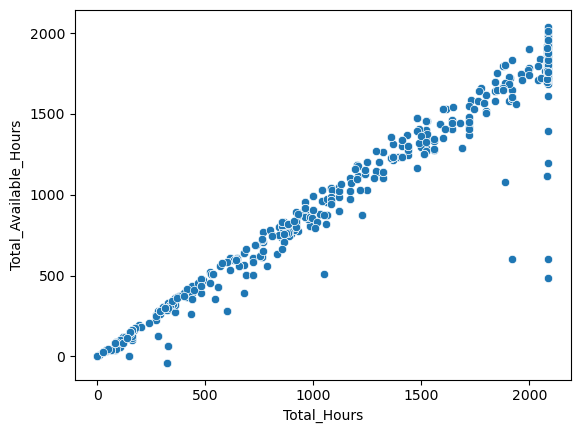

In [1191]:
sns.scatterplot(data = d, x = "Total_Hours", y = "Total_Available_Hours")

<Axes: xlabel='Total_Available_Hours', ylabel='Work_Hours'>

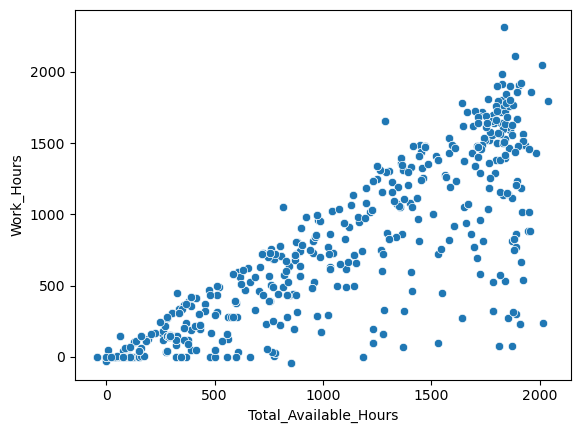

In [1192]:
sns.scatterplot(data = d, x = "Total_Available_Hours", y = "Work_Hours")

<Axes: xlabel='Work_Hours', ylabel='Leave_Hours'>

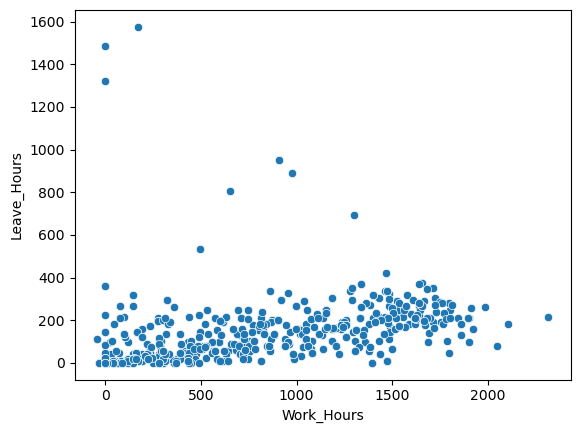

In [1193]:
sns.scatterplot(data = d, x = "Work_Hours", y = "Leave_Hours")

<Axes: xlabel='Work_Hours', ylabel='Training_Hours'>

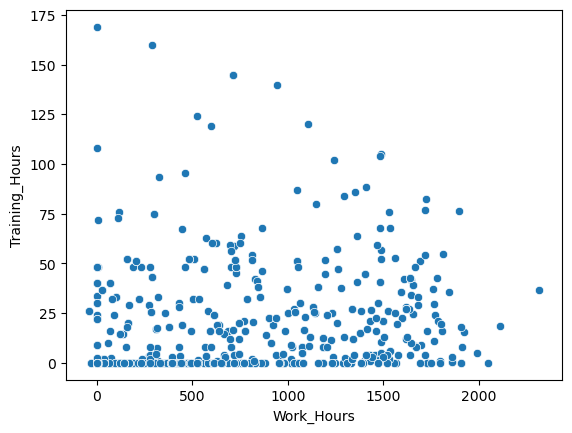

In [1194]:
sns.scatterplot(data = d, x = "Work_Hours", y = "Training_Hours")

<Axes: xlabel='Total_Hours', ylabel='Utilization%'>

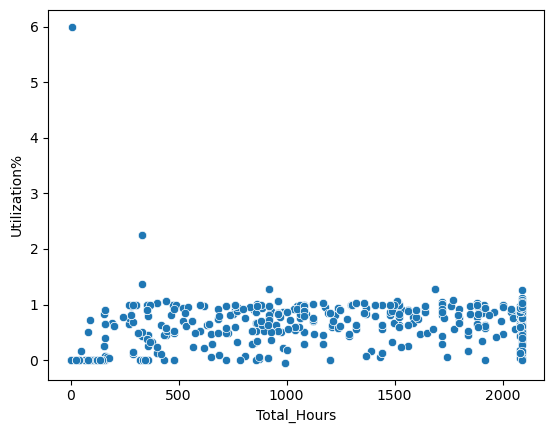

In [1195]:
sns.scatterplot(data = d, x = "Total_Hours", y = "Utilization%")

<Axes: xlabel='Training_Hours', ylabel='NC_Hours'>

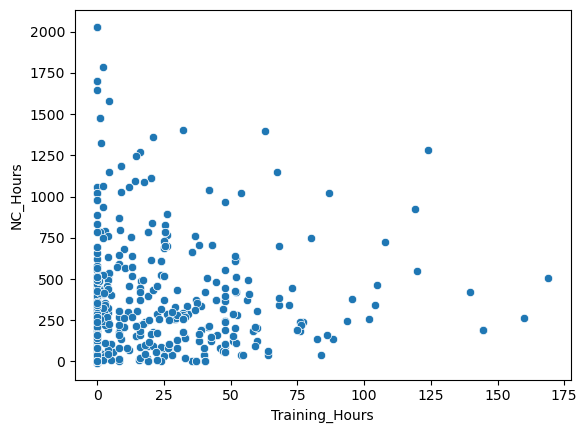

In [1196]:
sns.scatterplot(data = d, x = "Training_Hours", y = "NC_Hours")

<Axes: xlabel='Utilization%', ylabel='Work_Hours'>

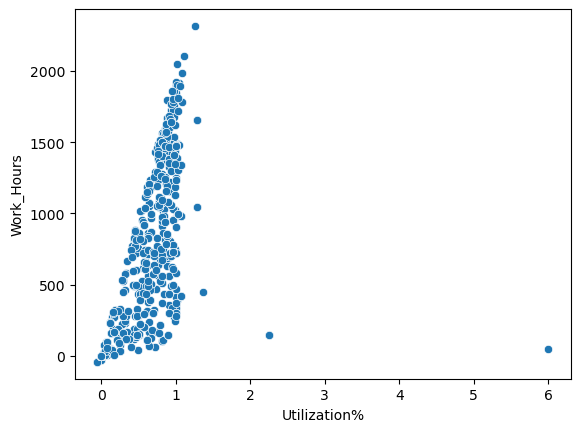

In [1197]:
sns.scatterplot(data = d, x = "Utilization%", y = "Work_Hours")

C:\Users\Riya\AppData\Local\Temp\ipykernel_38040\2918429547.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cr = d.corr()


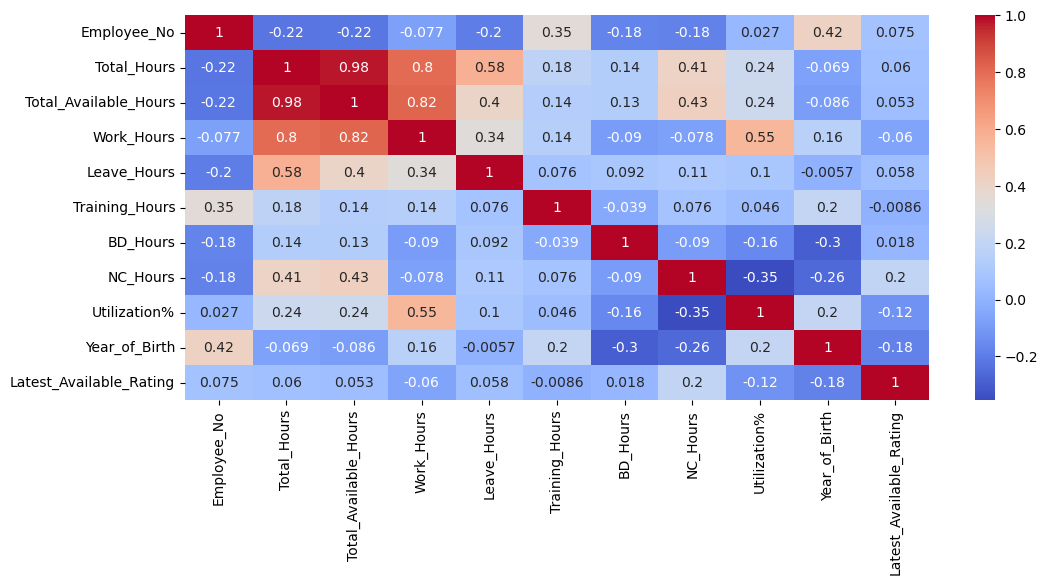

In [1198]:
plt.figure(figsize = (12,5))
cr = d.corr() 
sns.heatmap(cr, annot = True, cmap = "coolwarm")
plt.show()

## Feature Engineering 

In [1199]:
#categories current status
d["Current_Status"] = d["Current_Status"].replace(["Active", "New Joiner"], 1)
d["Current_Status"] = d["Current_Status"].replace(["Resigned", "Secondment"], 0)

In [1200]:
#replace gender with 0 and 1
d["Gender"] = d["Gender"].replace("F", 1)
d["Gender"] = d["Gender"].replace("M", 0)

In [1201]:
#age column
d["Age"] = 2023 - d["Year_of_Birth"]

In [1202]:
#drop columns
d.drop(columns = ["Profit_Center", "Employee_Name", "Employee_Position", "Employee_Location", "People_Group", "Supervisor_Name", "Previous_Employer", "Emp_Ref.", "Join_Date", "Termination_Date", "Total_Hours", "Total_Available_Hours", "BD_Hours", "NC_Hours", "Year_of_Birth", "Last_Update_Date", "Latest_Available_Rating"], inplace = True)

In [1203]:
d.head()

,Employee_No,Employee_Category,Current_Status,Work_Hours,Leave_Hours,Training_Hours,Utilization%,Gender,Leaving_Reason,Age
0,776,Staff on Probation,1,72.0,8.0,40.0,0.642857,1,Career Growth,34
1,776,Serving Notice Period,1,1590.0,184.0,35.5,0.854609,1,Career Growth,34
2,776,Serving Notice Period,1,1590.0,184.0,35.5,0.854609,1,Career Growth,34
3,144,Serving Notice Period,0,8.0,24.0,72.0,0.010309,0,Personal,43
4,978,Serving Notice Period,1,1024.0,32.0,8.0,0.984615,0,Personal,33


## Outlier Treatment 

In [1204]:
def outlier_treatment(df, col):
    q1 = df[col].quantile(.25)
    q3 = df[col].quantile(.75)
    lower_cap = q1 - 1.5 * (q3 - q1)
    upper_cap = q3 + 1.5 * (q3 - q1)

    df[col] = np.where(df[col] >= upper_cap, upper_cap, df[col])
    df[col] = np.where(df[col] <= lower_cap, lower_cap, df[col])

<Axes: ylabel='Leave_Hours'>

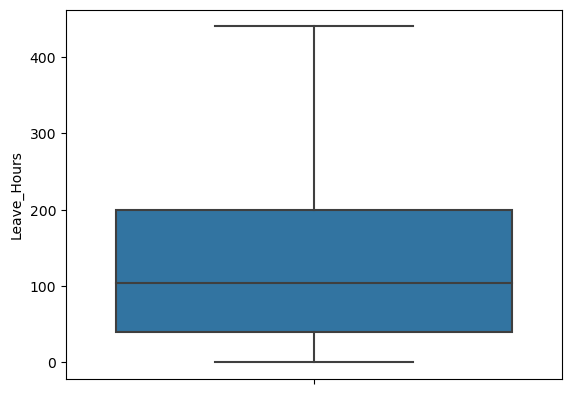

In [1205]:
outlier_treatment(d, col = "Leave_Hours")
sns.boxplot(d, y = "Leave_Hours")

<Axes: ylabel='Training_Hours'>

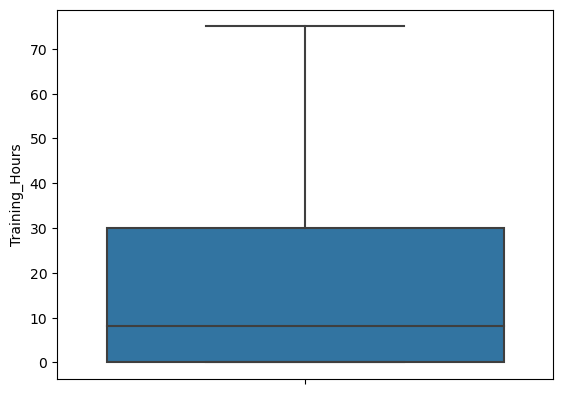

In [1206]:
outlier_treatment(d, col = "Training_Hours")
sns.boxplot(d, y = "Training_Hours")

<Axes: ylabel='Utilization%'>

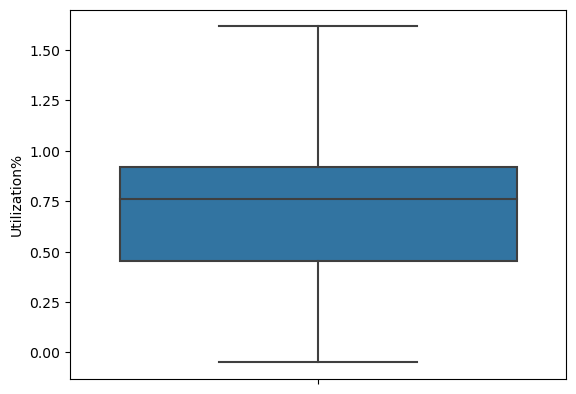

In [1207]:
outlier_treatment(d, col = "Utilization%")
sns.boxplot(d, y = "Utilization%")

<Axes: ylabel='Age'>

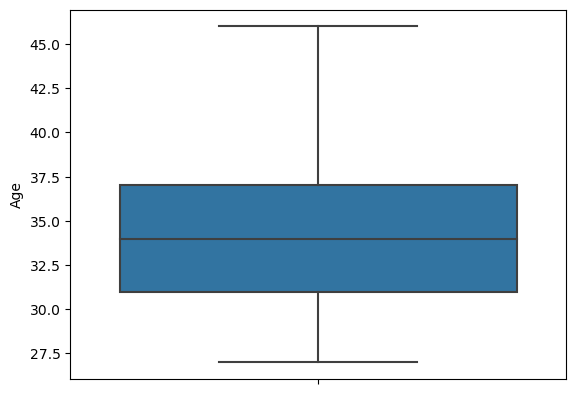

In [1208]:
outlier_treatment(d, col = "Age")
sns.boxplot(d, y = "Age")

## Creating Dummy Variables 

In [1209]:
final_df = pd.get_dummies(data = d, drop_first = True)
final_df

,Employee_No,Current_Status,Work_Hours,Leave_Hours,Training_Hours,Utilization%,Gender,Age,Employee_Category_Confirmed Staff,Employee_Category_Level 1/2,...,Leaving_Reason_Career Growth,Leaving_Reason_Counseled Out,Leaving_Reason_Deceased,Leaving_Reason_Employee Transfer,Leaving_Reason_Further Studies,Leaving_Reason_Job Related,Leaving_Reason_Others,Leaving_Reason_Personal,Leaving_Reason_Relationship Issues,Leaving_Reason_Working Conditions
0,776,1,72.0,8.0,40.0,0.642857,1,34.0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,776,1,1590.0,184.0,35.5,0.854609,1,34.0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,776,1,1590.0,184.0,35.5,0.854609,1,34.0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,144,0,8.0,24.0,72.0,0.010309,0,43.0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,978,1,1024.0,32.0,8.0,0.984615,0,33.0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577,761,0,1260.0,176.0,47.0,0.803059,1,35.0,0,0,...,0,0,0,0,0,0,0,1,0,0
578,553,0,432.0,8.0,28.0,0.596685,0,36.0,0,0,...,1,0,0,0,0,0,0,0,0,0
579,633,1,1242.0,168.0,75.0,0.856552,0,27.0,1,0,...,0,0,0,0,0,0,0,1,0,0
580,633,0,784.0,64.0,32.0,0.867257,0,27.0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Model Development

### 1. Logistic Regression 

In [1210]:
x = final_df.drop(columns = ["Employee_No", "Current_Status"])
y = final_df["Current_Status"]

In [1211]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 12)

In [1212]:
lr = LogisticRegression(max_iter = 10000)
lr.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [1213]:
print("Train Accuracy: ", round(lr.score(x_train, y_train), 3))
print("Test Accuracy :", round(lr.score(x_test, y_test), 3))

Train Accuracy:  0.958
Test Accuracy : 0.931


In [1214]:
y_train_pred_lr = lr.predict(x_train)
y_test_pred_lr = lr.predict(x_test)

In [1215]:
print(metrics.classification_report(y_train, y_train_pred_lr))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       299
           1       0.95      0.89      0.92       108

    accuracy                           0.96       407
   macro avg       0.96      0.94      0.95       407
weighted avg       0.96      0.96      0.96       407



In [1216]:
print(metrics.classification_report(y_test, y_test_pred_lr))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       133
           1       0.89      0.81      0.85        42

    accuracy                           0.93       175
   macro avg       0.92      0.89      0.90       175
weighted avg       0.93      0.93      0.93       175



### 2. Decision Tree 

In [1246]:
tree = DecisionTreeClassifier(max_depth = 7)
tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=7)

In [1247]:
print("Train Accuracy: ", round(tree.score(x_train, y_train), 3))
print("Test Accuracy :", round(tree.score(x_test, y_test), 3))

Train Accuracy:  0.971
Test Accuracy : 0.897


In [1248]:
y_train_pred_tree = tree.predict(x_train)
y_test_pred_tree = tree.predict(x_test)

In [1249]:
print(metrics.classification_report(y_train, y_train_pred_tree))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       299
           1       0.94      0.95      0.94       108

    accuracy                           0.97       407
   macro avg       0.96      0.97      0.96       407
weighted avg       0.97      0.97      0.97       407



In [1250]:
print(metrics.classification_report(y_test, y_test_pred_tree))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       133
           1       0.77      0.81      0.79        42

    accuracy                           0.90       175
   macro avg       0.86      0.87      0.86       175
weighted avg       0.90      0.90      0.90       175



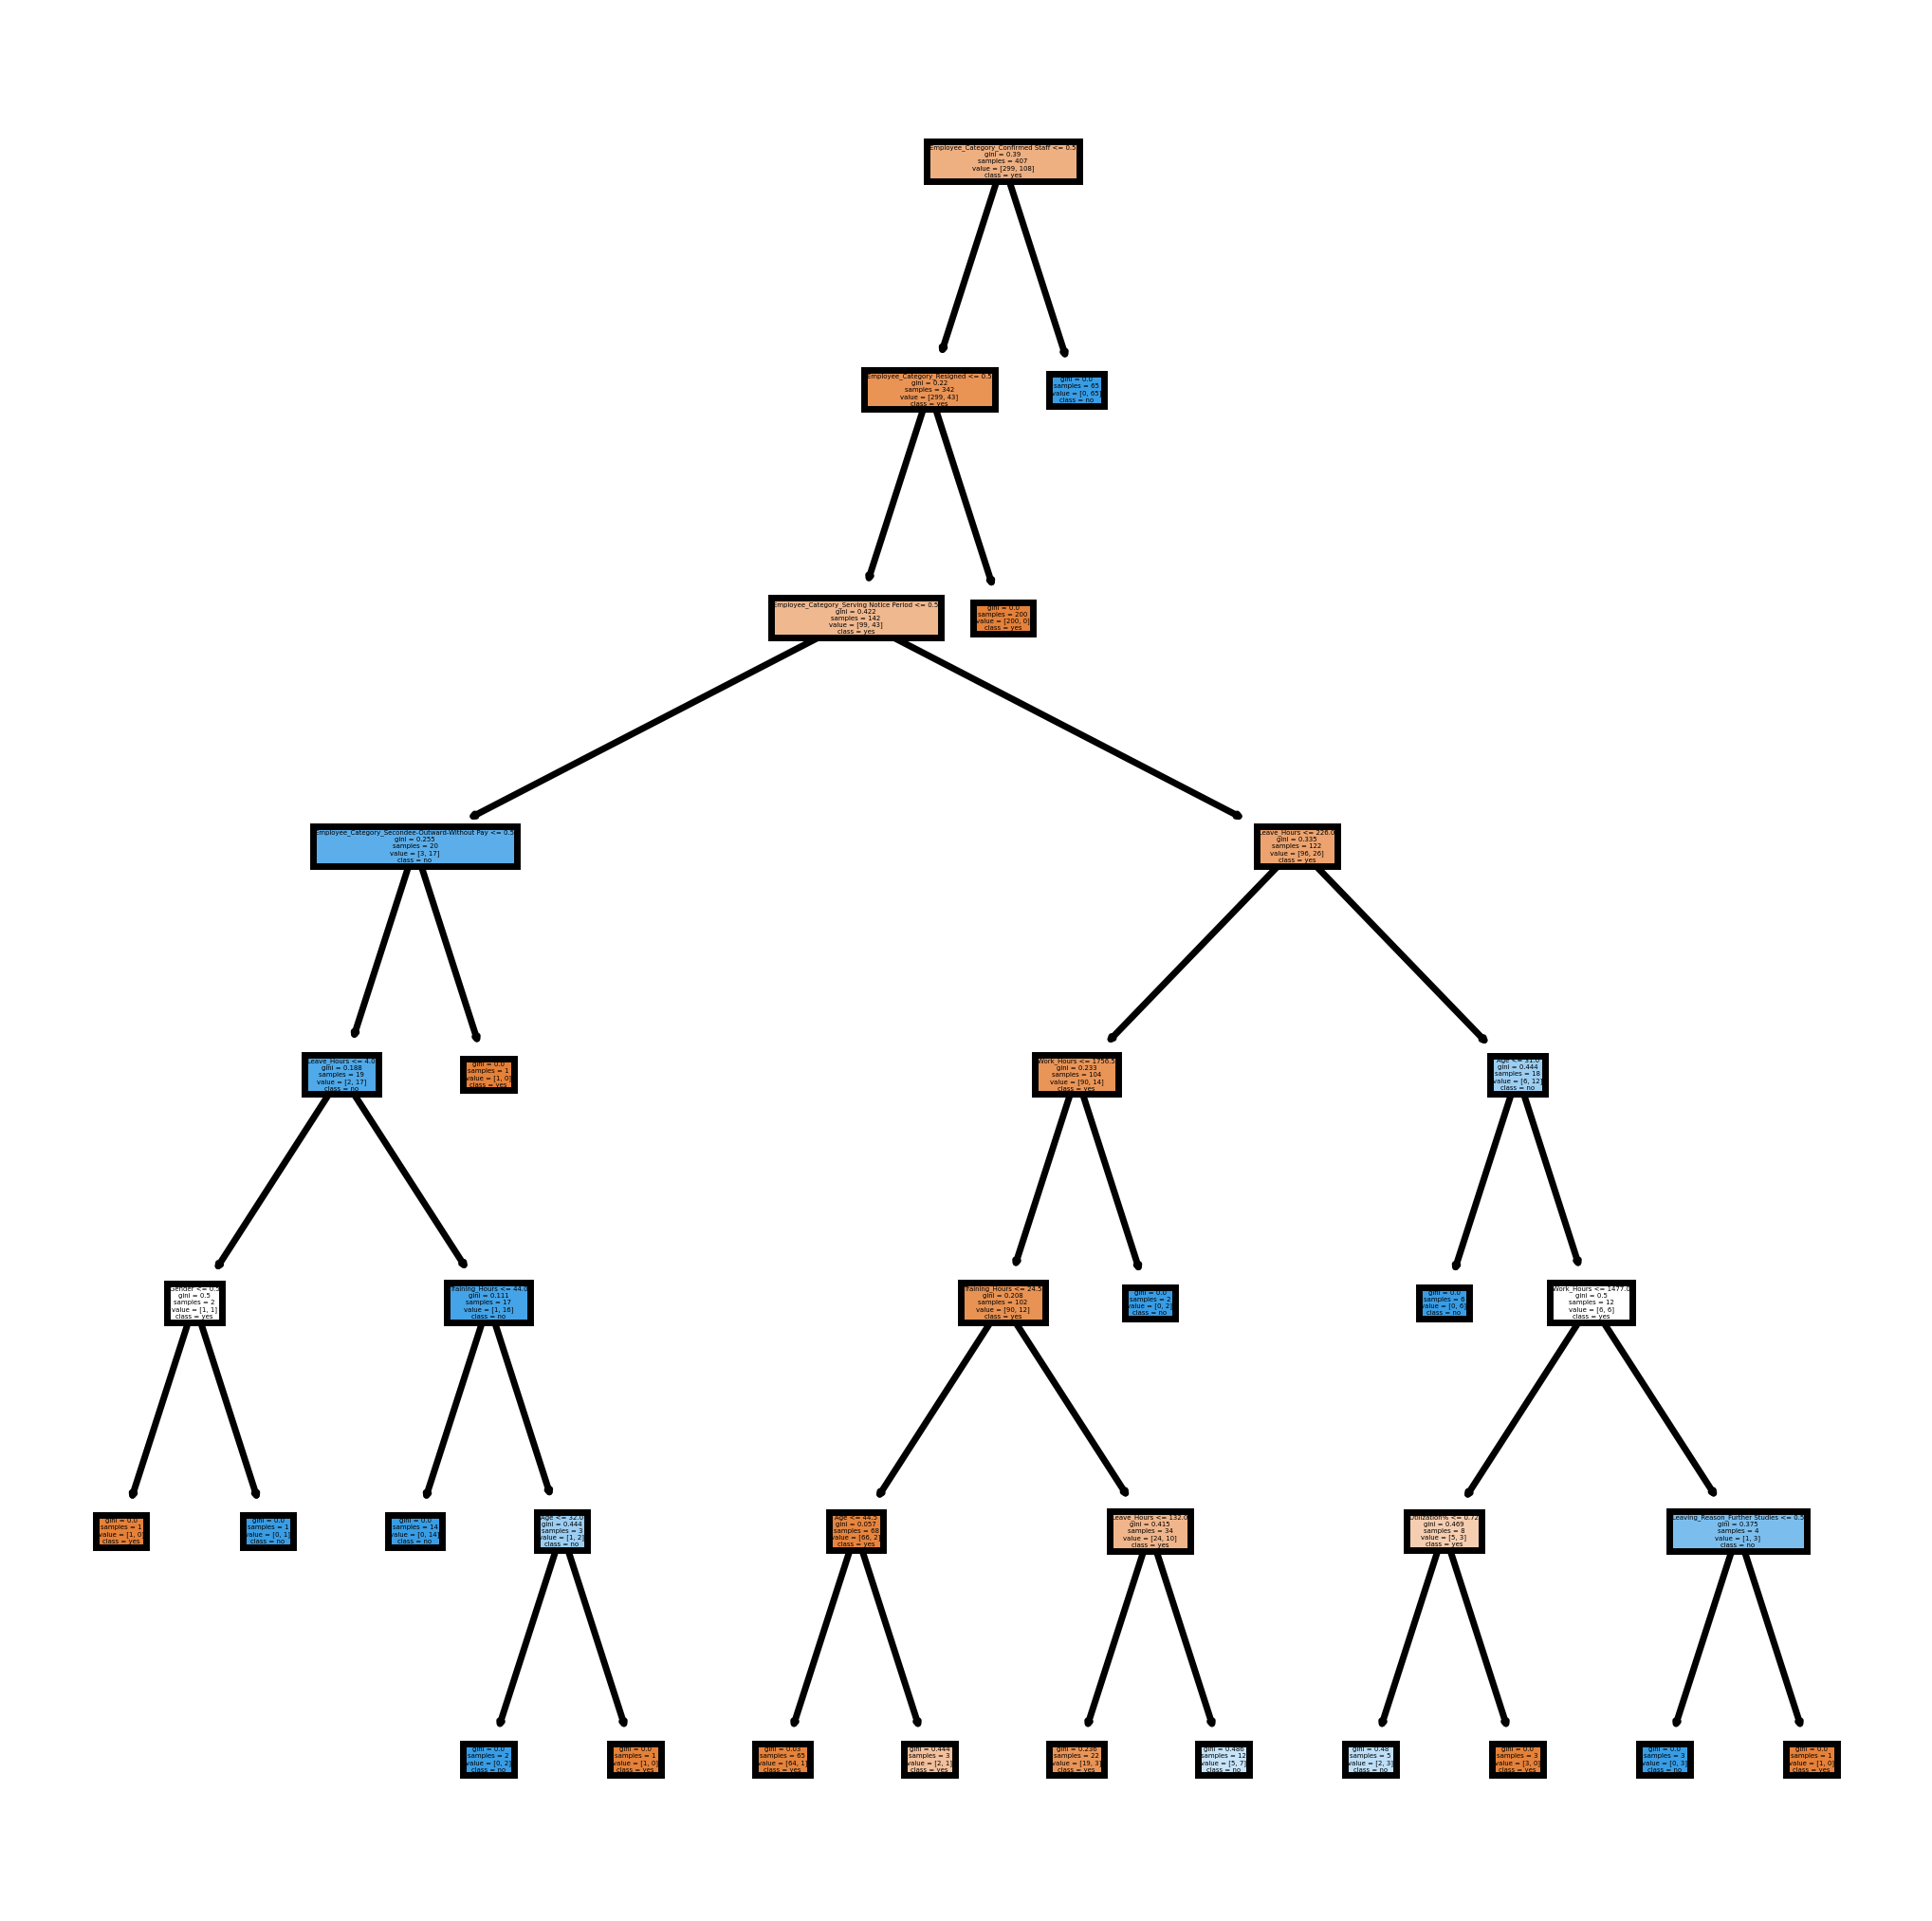

In [1233]:
from sklearn.tree import plot_tree
fn = x_train.columns.to_list()
cn = ["yes", "no"]
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (5,5), dpi = 500)
dt_plot = plot_tree(tree, feature_names = fn, class_names = cn, filled = True)

### 3. Random Forest 

In [1234]:
rf = RandomForestClassifier(max_depth = 7)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=7)

In [1235]:
print("Train Accuracy: ", round(rf.score(x_train, y_train), 3))
print("Test Accuracy :", round(rf.score(x_test, y_test), 3))

Train Accuracy:  0.98
Test Accuracy : 0.931


In [1236]:
y_train_pred_rf = rf.predict(x_train)
y_test_pred_rf = rf.predict(x_test)

In [1237]:
print(metrics.classification_report(y_train, y_train_pred_rf))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       299
           1       1.00      0.93      0.96       108

    accuracy                           0.98       407
   macro avg       0.99      0.96      0.97       407
weighted avg       0.98      0.98      0.98       407



In [1238]:
print(metrics.classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       133
           1       0.97      0.74      0.84        42

    accuracy                           0.93       175
   macro avg       0.95      0.87      0.90       175
weighted avg       0.93      0.93      0.93       175

